In [2]:
!pip install pandas numpy matplotlib PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 3.2 MB/s 
     |████████████████████████████████| 2.8 MB 6.5 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
pypfopt.__version__

'1.5.2'

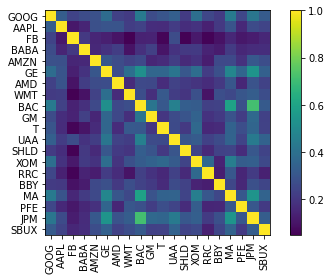

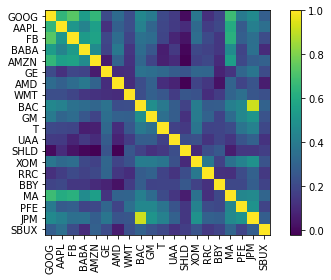

In [4]:
df = pd.read_csv("data/stock_prices.csv", parse_dates=True, index_col="date")
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

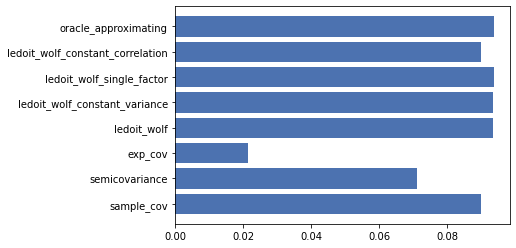

In [5]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

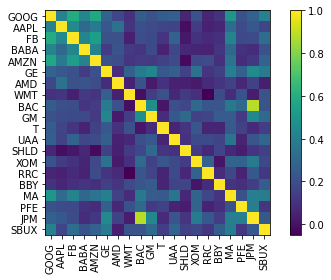

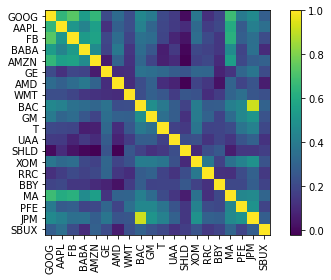

In [6]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

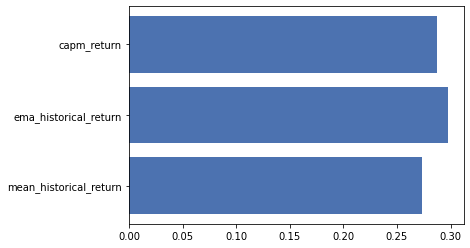

In [7]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [8]:
print(mean_abs_errors)


[0.2732675295106071, 0.29740354389638524, 0.28701847303235856]


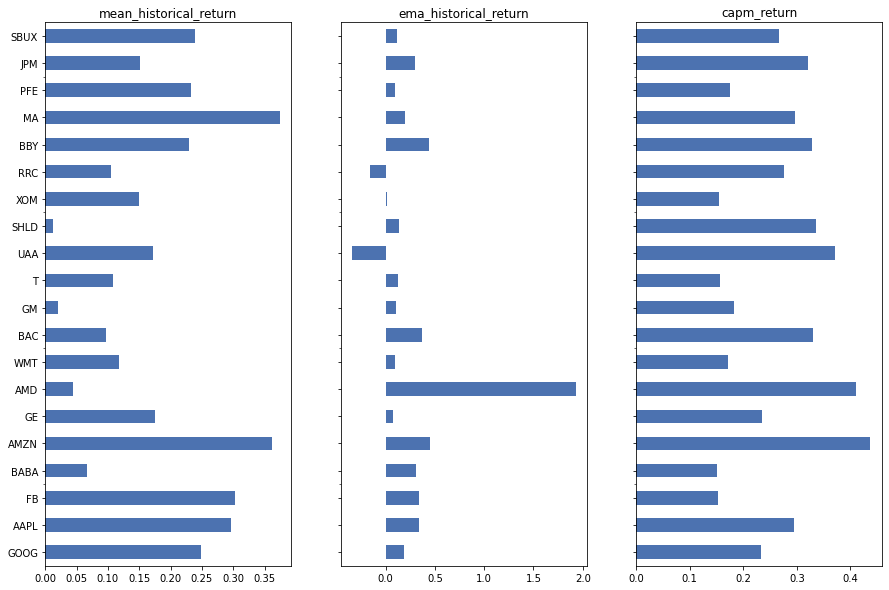

In [9]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7126 entries, 1989-12-29 to 2018-04-11
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    3435 non-null   float64
 1   AAPL    7126 non-null   float64
 2   FB      1483 non-null   float64
 3   BABA    896 non-null    float64
 4   AMZN    5261 non-null   float64
 5   GE      7126 non-null   float64
 6   AMD     7126 non-null   float64
 7   WMT     7126 non-null   float64
 8   BAC     7126 non-null   float64
 9   GM      1860 non-null   float64
 10  T       7126 non-null   float64
 11  UAA     3118 non-null   float64
 12  SHLD    3763 non-null   float64
 13  XOM     7126 non-null   float64
 14  RRC     6369 non-null   float64
 15  BBY     7126 non-null   float64
 16  MA      2990 non-null   float64
 17  PFE     7126 non-null   float64
 18  JPM     7126 non-null   float64
 19  SBUX    6496 non-null   float64
dtypes: float64(20)
memory usage: 1.1 MB


In [14]:
pip install yfinance 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.3 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [31]:
import yfinance as yf
tickers = ["ICICIBANK.NS", "HDFCLIFE.NS", "ONGC.NS",  "CIPLA.NS","BLK", "BAC", "AAPL", "TM", "WMT","JD", "INTU", "MA", "UL", "CVS","DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  19 of 19 completed


,AAPL,AMD,BAC,BLK,CIPLA.NS,CVS,DIS,HDFCLIFE.NS,ICICIBANK.NS,INTU,JD,MA,NVDA,ONGC.NS,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,,,,,
2022-06-03,145.380005,106.300003,36.189999,671.739990,960.950012,94.900002,108.669998,602.700012,744.299988,408.950012,56.520000,357.820007,187.160431,151.600006,4.86,161.039993,164.809998,46.520000,125.320000
2022-06-06,146.139999,105.650002,36.150002,675.340027,976.049988,95.720001,107.830002,606.099976,746.750000,408.970001,60.209999,360.140015,187.820297,153.949997,4.92,159.669998,165.580002,46.709999,124.870003
2022-06-07,148.710007,105.279999,36.349998,679.609985,972.750000,95.919998,107.790001,605.299988,735.250000,416.649994,61.740002,364.019989,189.219986,161.850006,4.75,155.979996,166.250000,46.750000,123.370003
2022-06-08,147.960007,101.900002,35.889999,662.409973,962.950012,93.879997,107.339996,599.950012,729.500000,414.459991,66.470001,362.329987,186.479996,163.399994,4.70,156.699997,165.350006,46.040001,122.300003
2022-06-09,NaN,NaN,NaN,NaN,964.400024,NaN,NaN,603.000000,728.049988,NaN,NaN,NaN,NaN,165.250000,NaN,NaN,NaN,NaN,NaN


In [32]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CIPLA.NS,CVS,DIS,HDFCLIFE.NS,ICICIBANK.NS,INTU,JD,MA,NVDA,ONGC.NS,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,,,,,
2022-06-03,-0.038556,-0.021088,-0.013897,-0.014480,-0.026492,-0.023964,-0.019843,-0.008554,-0.007269,-0.041957,-0.025517,-0.014487,-0.044508,-0.005576,-0.016194,0.000808,-0.031896,-0.002787,-0.017175
2022-06-06,0.005228,-0.006115,-0.001105,0.005359,0.015714,0.008641,-0.007730,0.005641,0.003292,0.000049,0.065287,0.006484,0.003526,0.015501,0.012346,-0.008507,0.004672,0.004084,-0.003591
2022-06-07,0.017586,-0.003502,0.005532,0.006323,-0.003381,0.002089,-0.000371,-0.001320,-0.015400,0.018779,0.025411,0.010774,0.007452,0.051315,-0.034553,-0.023110,0.004046,0.000856,-0.012012
2022-06-08,-0.005043,-0.032105,-0.012655,-0.025309,-0.010075,-0.021268,-0.004175,-0.008839,-0.007820,-0.005256,0.076612,-0.004643,-0.014480,0.009577,-0.010526,0.004616,-0.005413,-0.015187,-0.008673
2022-06-09,0.000000,0.000000,0.000000,0.000000,0.001506,0.000000,0.000000,0.005084,-0.001988,0.000000,0.000000,0.000000,0.000000,0.011322,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
from pypfopt import HRPOpt


In [34]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.02941),
             ('AMD', 0.00882),
             ('BAC', 0.03186),
             ('BLK', 0.0406),
             ('CIPLA.NS', 0.00055),
             ('CVS', 0.09991),
             ('DIS', 0.04811),
             ('HDFCLIFE.NS', 0.11507),
             ('ICICIBANK.NS', 0.05644),
             ('INTU', 0.02148),
             ('JD', 0.02931),
             ('MA', 0.03941),
             ('NVDA', 0.00859),
             ('ONGC.NS', 0.0551),
             ('PBI', 0.06499),
             ('TGT', 0.08202),
             ('TM', 0.07591),
             ('UL', 0.11334),
             ('WMT', 0.07907)])

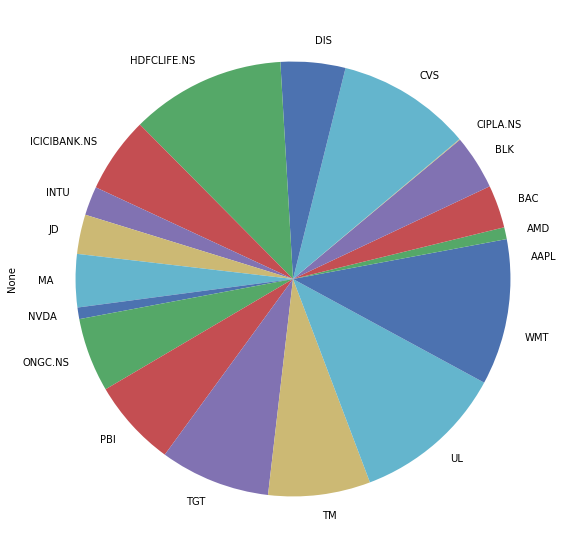

In [35]:
pd.Series(weights).plot.pie(figsize=(10, 10));


In [36]:
hrp.portfolio_performance(verbose=True);


Expected annual return: 19.0%
Annual volatility: 17.1%
Sharpe Ratio: 0.99


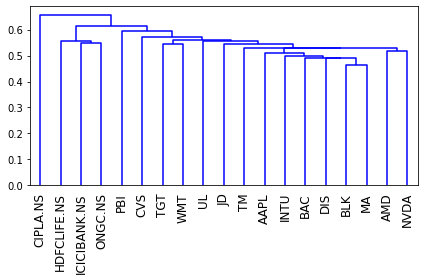

In [37]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);